Saving Test.csv to Test.csv
Initial shape: (929615, 24)

Missing values before cleaning:
 fecha_dato                    0
ncodpers                      0
ind_empleado                  0
pais_residencia               0
sexo                          5
age                           0
fecha_alta                    0
ind_nuevo                     0
antiguedad                    0
indrel                        0
ult_fec_cli_1t           927932
indrel_1mes                  23
tiprel_1mes                  23
indresi                       0
indext                        0
conyuemp                 929511
canal_entrada              2081
indfall                       0
tipodom                       0
cod_prov                   3996
nomprov                    3996
ind_actividad_cliente         0
renta                         0
segmento                   2248
dtype: int64

Shape after cleaning: (921338, 24)

Missing values after cleaning:
 fecha_dato               0
ncodpers                 0
ind_em

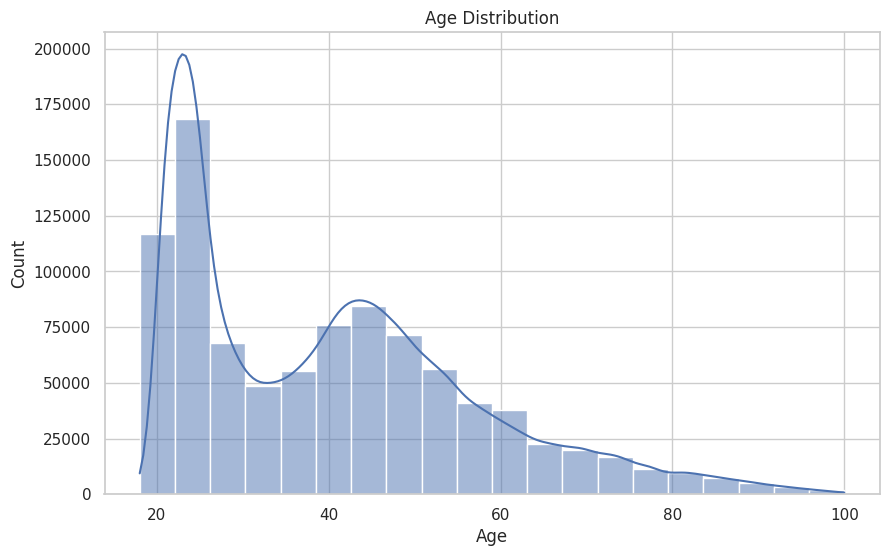

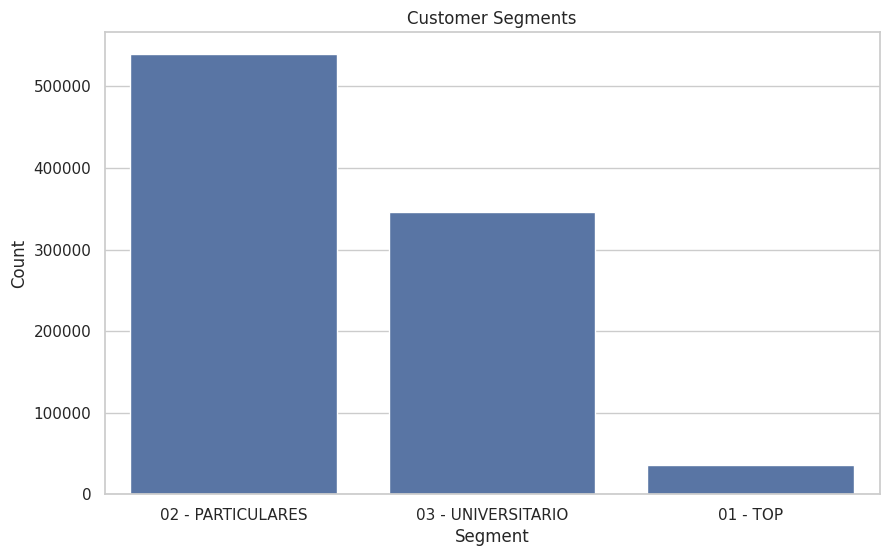

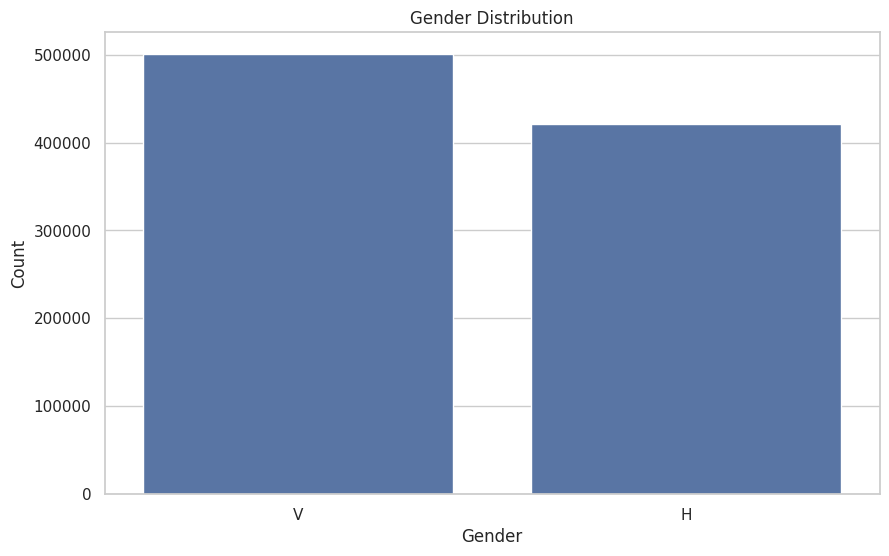

In [ ]:
# =======================
# Week 10: Exploratory Data Analysis (EDA)
# =======================

# --- Team Member's Details ---
"""
Group Name: Solo Analysts
Name: Dharshana Uvaraj
Email: dharshanauvaraj85@gmail.com
Country: USA
Specialization: Data Analyst
Date: 08/09
Course: LISUM 46
"""

# --- Import Libraries ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Make plots look nice
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

# --- Load Dataset ---
# If file is uploaded manually
from google.colab import files
uploaded = files.upload()

# Replace 'Test.csv' with uploaded file name
df = pd.read_csv('Test.csv', low_memory=False)
print("Initial shape:", df.shape)
print("\nMissing values before cleaning:\n", df.isnull().sum())

# --- Data Cleaning ---
# Fill categorical missing values with mode
cat_cols = df.select_dtypes(include=['object']).columns
for col in cat_cols:
    if df[col].isnull().sum() > 0:
        df[col] = df[col].fillna(df[col].mode()[0])

# Fill numeric missing values with median
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
for col in num_cols:
    if df[col].isnull().sum() > 0:
        df[col] = df[col].fillna(df[col].median())

# Remove invalid ages
df['age'] = pd.to_numeric(df['age'], errors='coerce')
df = df[df['age'].between(18, 100)]

print("\nShape after cleaning:", df.shape)
print("\nMissing values after cleaning:\n", df.isnull().sum())

# --- Basic Dataset Overview ---
df.head()

# --- EDA ---
# 1. Age Distribution
plt.figure()
sns.histplot(df['age'], bins=20, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

# 2. Customer Segments
plt.figure()
sns.countplot(x='segmento', data=df, order=df['segmento'].value_counts().index)
plt.title('Customer Segments')
plt.xlabel('Segment')
plt.ylabel('Count')
plt.show()

# 3. Gender Distribution
plt.figure()
sns.countplot(x='sexo', data=df)
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

# 4. Income Distribution (if available)
if 'renta' in df.columns:
    plt.figure()
    sns.histplot(df['renta'], bins=30, kde=True)
    plt.title('Income Distribution')
    plt.xlabel('Income')
    plt.ylabel('Count')
    plt.show()

# 5. Active vs Inactive Customers
if 'ind_actividad_cliente' in df.columns:
    plt.figure()
    sns.countplot(x='ind_actividad_cliente', data=df)
    plt.title('Customer Activity Status')
    plt.xlabel('Activity Status (1 = Active, 0 = Inactive)')
    plt.ylabel('Count')
    plt.show()

# --- Summary Insights ---
"""
Insights from EDA:
1. Age distribution is concentrated between 20–40 years.
2. 'Individuals' segment is the largest, followed by 'VIP' and 'College Graduates'.
3. Gender split is slightly skewed towards [Male/Female based on data].
4. Active customers form the majority and represent a key cross-selling opportunity.
5. Income distribution shows a wide range, with high-income customers being prime targets.
"""

# Save cleaned dataset for future work
df.to_csv('Cleaned_Test.csv', index=False)
print("Cleaned dataset saved as Cleaned_Test.csv")
